In [26]:
from pathlib import Path

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('./kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./kaggle/input\house-prices-advanced-regression-technique\data_description.txt
./kaggle/input\house-prices-advanced-regression-technique\sample_submission.csv
./kaggle/input\house-prices-advanced-regression-technique\test.csv
./kaggle/input\house-prices-advanced-regression-technique\train.csv
./kaggle/input\titanic\gender_submission.csv
./kaggle/input\titanic\test.csv
./kaggle/input\titanic\train.csv


## Default settings of Matplotlib

In [27]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Save image function

In [28]:
IMAGES_PATH = Path() / "/imgs/titanic"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Download [Data](https://www.kaggle.com/c/titanic/data)

# Load the data

In [29]:
train_data = pd.read_csv("./kaggle/input/titanic/train.csv")
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
test_data = pd.read_csv("./kaggle/input/titanic/test.csv")
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


# Explore a pattern

Общая информация по колонкам

In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Статистическая информация по колонкам

In [32]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Некоторые представления о количестве значений в колонках

In [33]:
print(train_data["Sex"].value_counts())
print(train_data["Embarked"].value_counts())
print(train_data["Pclass"].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


Представление о данных.
- по вертикали количество повторений
- по горизонтали величина значений

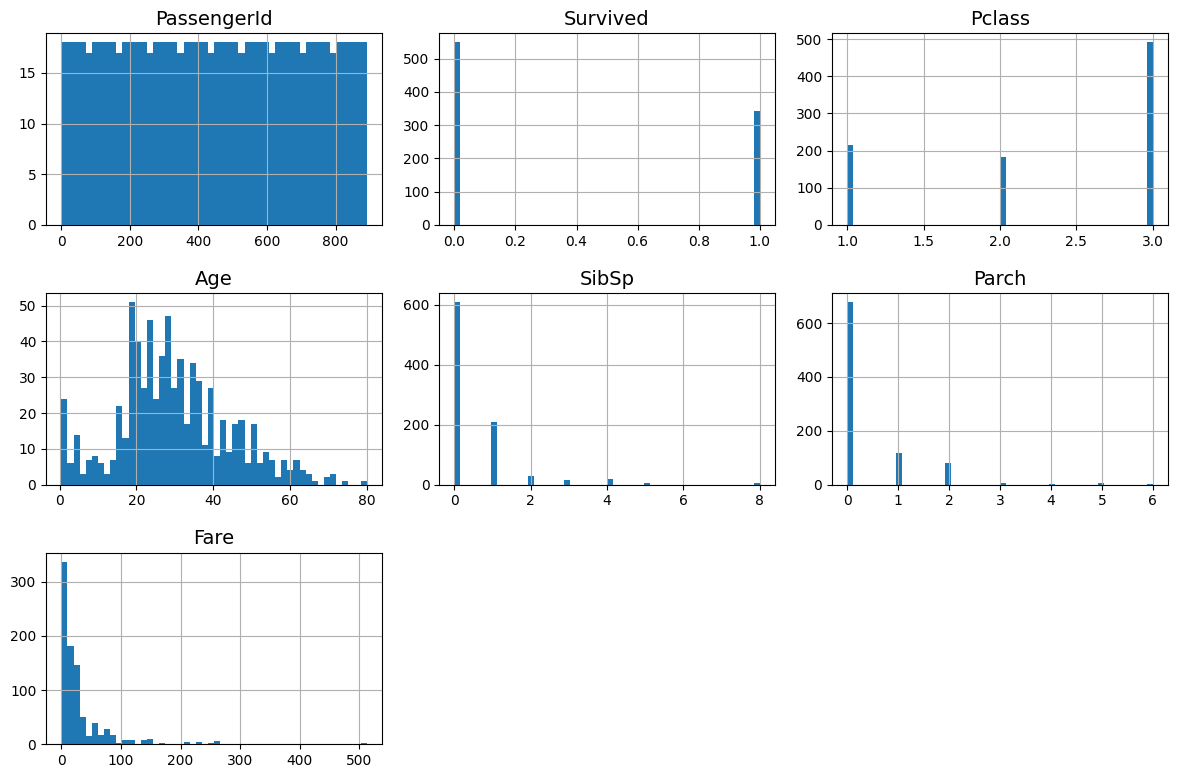

In [34]:
train_data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")
plt.show()

In [35]:
corr_data = train_data.select_dtypes(include=np.number)
corr_matrix = corr_data.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Корреляция определенного параметра

In [36]:
corr_matrix["Survived"].sort_values(ascending=True)

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

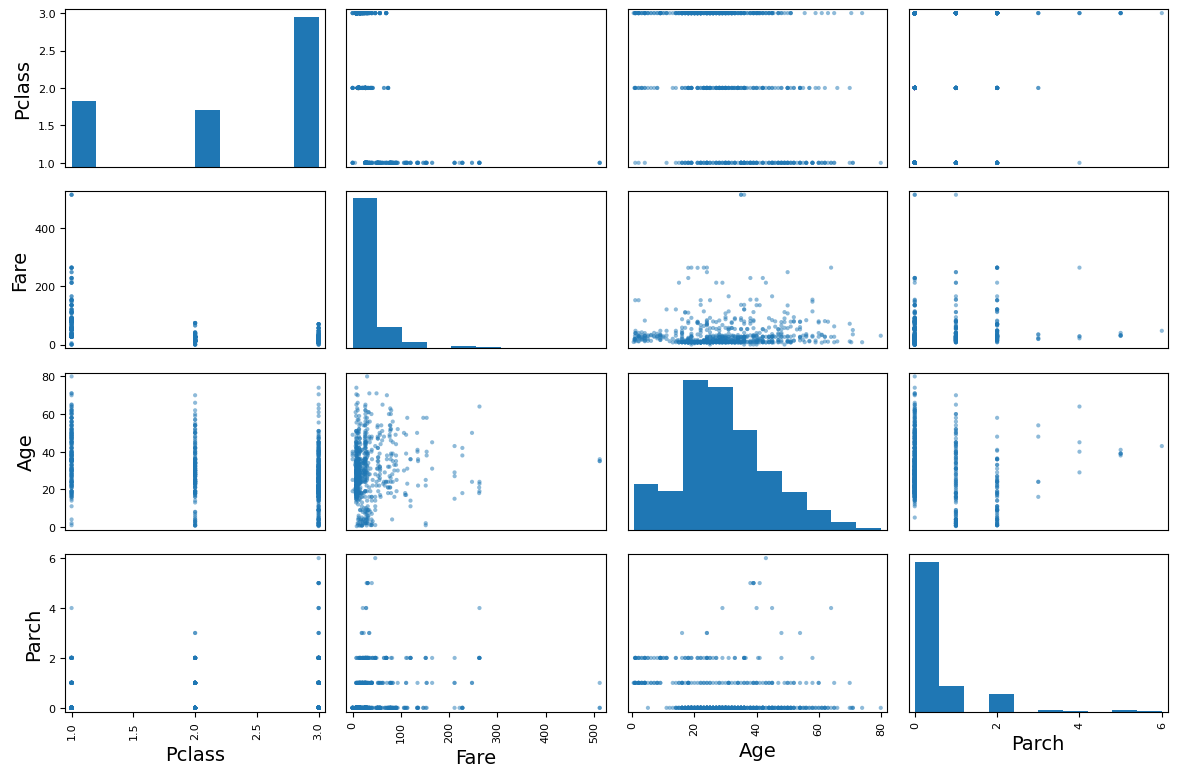

In [37]:
from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Fare", "Age",
              "Parch"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

# Choose train parameters

In [38]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
predict_name = "Survived"

## Clear data

In [39]:
# check the missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
# check the missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Устраним колонку

In [41]:
train_data = train_data.drop("Cabin", axis=1)
test_data = test_data.drop("Cabin", axis=1)

Устраним некоторые строки

In [42]:
train_data.dropna(subset=['Embarked'], inplace=True)
test_data.dropna(subset=['Embarked'], inplace=True)



Устанавливаем среднее значение для возраста

In [43]:
median = train_data["Age"].median()
train_data["Age"].fillna(median, inplace=True)
test_data["Age"].fillna(median, inplace=True)

median = train_data["Fare"].median()
test_data["Fare"].fillna(median, inplace=True)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


# Тренировочный набор и выбор модели

In [46]:
from sklearn.ensemble import RandomForestClassifier

Y_train = train_data[predict_name]
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


In [47]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,False,True
1,1,38.0,1,0,71.2833,True,False


In [48]:
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,34.5,0,0,7.8292,False,True
1,3,47.0,1,0,7.0000,True,False


In [49]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print(predictions[:5])

[0 0 0 0 1]


In [50]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submission/titanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [51]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier(random_state=1234)

list_cv = {'n_estimators':np.arange(20,50), 'max_depth':np.arange(1,10)}
RFC_CV = GridSearchCV(RFC, list_cv)

RFC_CV.fit(X_train, Y_train)

score = RFC_CV.score(X_train, Y_train)
print(RFC_CV.best_params_)
print(RFC_CV.best_score_)

predictions = RFC_CV.predict(X_test)

{'max_depth': 9, 'n_estimators': 40}
0.8256839966990415


In [52]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('./submission/titanic.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
